In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
from google.colab import files
uploaded = files.upload()



Saving Iris.csv to Iris.csv


In [4]:
df = pd.read_csv("Iris.csv")
df.head()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:

if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)




In [6]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


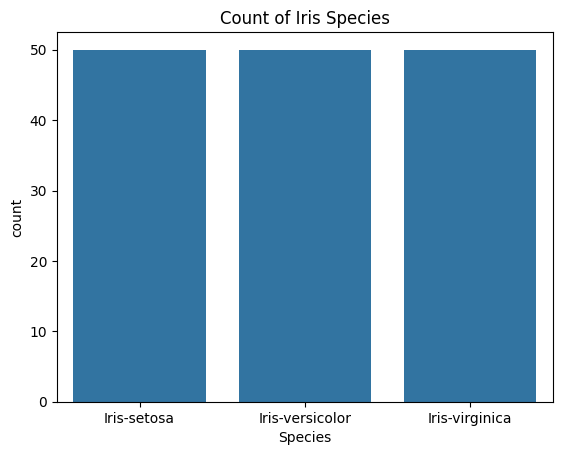

In [7]:
sns.countplot(x='Species', data=df)
plt.title("Count of Iris Species")
plt.show()



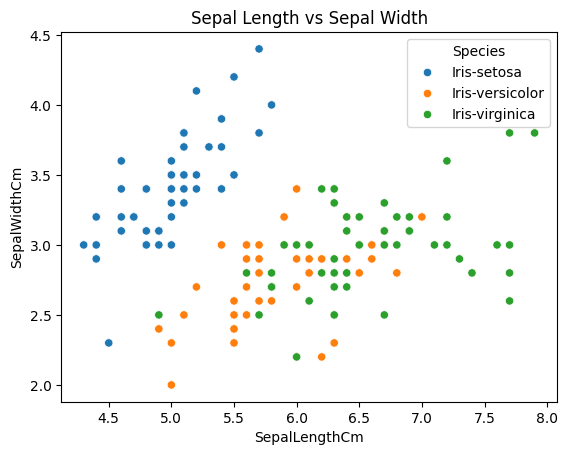

In [8]:
sns.scatterplot(
    x='SepalLengthCm',
    y='SepalWidthCm',
    hue='Species',
    data=df
)
plt.title("Sepal Length vs Sepal Width")
plt.show()



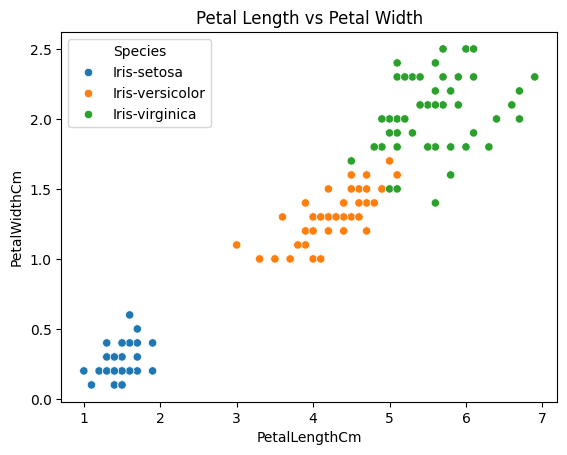

In [9]:
sns.scatterplot(
    x='PetalLengthCm',
    y='PetalWidthCm',
    hue='Species',
    data=df
)
plt.title("Petal Length vs Petal Width")
plt.show()



In [10]:
X = df.drop('Species', axis=1)
y = df['Species']



In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)



LogisticRegression(max_iter=200)

In [13]:
y_pred = model.predict(X_test)



In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



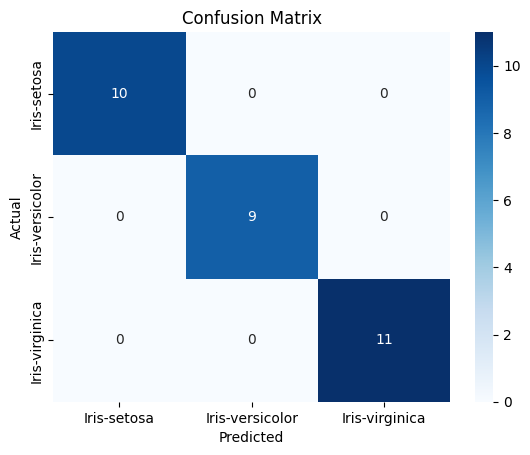

In [15]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [16]:
new_flower = pd.DataFrame(
    [[5.1, 3.5, 1.4, 0.2]],
    columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
)

prediction = model.predict(new_flower)
print("Predicted Iris Species:", prediction[0])




Predicted Iris Species: Iris-setosa


In [17]:
print("Iris Flower Classification Project Completed Successfully")



Iris Flower Classification Project Completed Successfully
